# Análisis del dataset MMM semanal (India)

Este notebook resume el comportamiento observado en `synthetic_mmm_weekly_india.csv` y traza los pasos para construir un modelo de Marketing Mix con esas variables. La idea es tener un punto de partida rápido para entender la granularidad, las palancas disponibles y la rigidez del KPI.


## Analisis exploratorio

### Definiciones

In [19]:
"""
Load of the dataframe
"""
import pandas as pd
from pathlib import Path

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df_main.describe()


path = Path('/Users/juanmedina1810/Desktop/marketing_insights_project/data/raw/weekly_india/synthetic_mmm_weekly_india.csv')

df_main = pd.read_csv(path, parse_dates=['Week'])
df_main = df_main.sort_values('Week')

print(f'Shape: {df_main.shape}')
display(df_main.head())


Shape: (11232, 28)


,Week,Geo,Brand,SKU,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,TPR_Flag,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
0,2022-07-04,CENTRAL,BrandA,BrandA_SKU1,106.327944,10551.108260,99.231753,99.231753,0,0,0,12108.945933,1.097593e+06,526732.456845,476584.682221,153004.959591,78906.938696,1.050008e+06,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.24444,1.180806,5.378450
51,2022-07-04,NORTHEAST,BrandC,BrandC_SKU1,86.890420,5022.978068,57.808192,57.808192,0,0,0,13616.569652,2.750571e+05,120199.021228,97337.569229,33773.561168,22089.165928,2.577155e+05,73.725344,76.223658,0.434818,0.430918,36.029924,3.277555,115.377600,5.07394,0.855645,4.729768
50,2022-07-04,NORTHEAST,BrandB,BrandB_SKU3,26.414406,2159.158135,81.741689,81.741689,0,0,0,13616.569652,5.910005e+05,214922.930575,177730.462181,60757.632333,41080.549314,4.455845e+05,73.725344,76.223658,0.434818,0.430918,36.029924,3.277555,115.377600,5.07394,0.855645,4.729768
49,2022-07-04,NORTHEAST,BrandB,BrandB_SKU2,128.322961,10008.159352,77.991961,77.991961,0,0,0,13616.569652,3.534878e+05,129222.735250,122089.485936,38053.495644,27028.458770,2.705343e+05,73.725344,76.223658,0.434818,0.430918,36.029924,3.277555,115.377600,5.07394,0.855645,4.729768
48,2022-07-04,NORTHEAST,BrandB,BrandB_SKU1,63.865638,4606.745823,72.131838,72.131838,0,0,0,13616.569652,6.219886e+05,257125.565333,206715.038120,72096.616879,45374.513866,4.866983e+05,73.725344,76.223658,0.434818,0.430918,36.029924,3.277555,115.377600,5.07394,0.855645,4.729768


In [ ]:
"""
List of unique columns with description
"""
df_main.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Week,11232,NaN,NaN,NaN,2023-12-28 12:00:00,2022-07-04 00:00:00,2023-04-01 06:00:00,2023-12-28 12:00:00,2024-09-24 18:00:00,2025-06-23 00:00:00,NaN
Geo,11232,8,CENTRAL,1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,11232,3,BrandA,3744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,11232,9,BrandA_SKU1,1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Units,11232.0,NaN,NaN,NaN,422.432277,25.535563,203.969367,323.586788,531.248687,3353.778891,329.007914
Sales_Value,11232.0,NaN,NaN,NaN,33099.052755,2054.711829,15007.837952,24596.82379,41863.015312,307497.874229,27498.67557
MRP,11232.0,NaN,NaN,NaN,79.911714,52.759457,63.203164,80.030377,95.496787,112.972616,16.889088
Net_Price,11232.0,NaN,NaN,NaN,78.3536,46.696772,62.671267,78.568337,93.973444,112.972616,16.923665
Feature_Flag,11232.0,NaN,NaN,NaN,0.185096,0.0,0.0,0.0,0.0,1.0,0.388393
Display_Flag,11232.0,NaN,NaN,NaN,0.183494,0.0,0.0,0.0,0.0,1.0,0.387088


### Analisis exploratorio por variable

In [ ]:
"""
Unique values in categorical columns
"""

for col in ["Geo", "Brand", "SKU"]:
    values = sorted(df_main[col].dropna().unique())
    print(f"\n{col} ({len(values)} categorías):")
    print(values)


Geo (8 categorías):
['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']

Brand (3 categorías):
['BrandA', 'BrandB', 'BrandC']

SKU (9 categorías):
['BrandA_SKU1', 'BrandA_SKU2', 'BrandA_SKU3', 'BrandB_SKU1', 'BrandB_SKU2', 'BrandB_SKU3', 'BrandC_SKU1', 'BrandC_SKU2', 'BrandC_SKU3']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output

# =========================
# Config / Data
# =========================
df = df_main.copy()

time_col_default = "Week"
geo_col = "Geo"
brand_col = "Brand"
sku_col = "SKU"

# Asegurar datetime en Week (si ya es datetime, no rompe)
if time_col_default in df.columns:
    df[time_col_default] = pd.to_datetime(df[time_col_default], errors="coerce")

# Columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Paleta simple (4 colores, como pediste)
COLOR_PALETTE = {
    "Azul": "tab:blue",
    "Naranja": "tab:orange",
    "Verde": "tab:green",
    "Rojo": "tab:red",
}

def _sorted_unique(col):
    if col not in df.columns:
        return []
    return sorted(df[col].dropna().unique().tolist())

# =========================
# Widgets base
# =========================
w_time = widgets.Dropdown(
    options=df.columns.tolist(),
    value=time_col_default if time_col_default in df.columns else df.columns[0],
    description="Time:"
)

w_agg = widgets.Dropdown(
    options=["mean", "sum", "median"],
    value="mean",
    description="Agg:"
)

w_y1 = widgets.Dropdown(
    options=num_cols,
    value=num_cols[0] if num_cols else None,
    description="Y1:"
)

w_y2 = widgets.Dropdown(
    options=["(none)"] + num_cols,
    value="(none)",
    description="Y2:"
)

w_color_y1 = widgets.Dropdown(
    options=COLOR_PALETTE,
    value="tab:blue",
    description="Color Y1:"
)

w_color_y2 = widgets.Dropdown(
    options=COLOR_PALETTE,
    value="tab:orange",
    description="Color Y2:"
)

w_secondary = widgets.Checkbox(value=True, description="Y2 eje secundario")
w_grid = widgets.Checkbox(value=True, description="Grid")
w_year_lines = widgets.Checkbox(value=True, description="Líneas año")

# =========================
# Filtros categóricos (multi)
# =========================
w_geo = widgets.SelectMultiple(
    options=_sorted_unique(geo_col),
    value=tuple(_sorted_unique(geo_col)),
    description="Geo",
    rows=8
)

w_brand = widgets.SelectMultiple(
    options=_sorted_unique(brand_col),
    value=tuple(_sorted_unique(brand_col)),
    description="Brand",
    rows=5
)

w_sku = widgets.SelectMultiple(
    options=_sorted_unique(sku_col),
    value=tuple(_sorted_unique(sku_col)),
    description="SKU",
    rows=10
)

def _set_all(select_widget):
    select_widget.value = tuple(select_widget.options)

def _clear(select_widget):
    select_widget.value = tuple()

btn_geo_all = widgets.Button(description="All Geo", layout=widgets.Layout(width="90px"))
btn_geo_clear = widgets.Button(description="Clear", layout=widgets.Layout(width="90px"))
btn_geo_all.on_click(lambda _: _set_all(w_geo))
btn_geo_clear.on_click(lambda _: _clear(w_geo))

btn_brand_all = widgets.Button(description="All Brand", layout=widgets.Layout(width="90px"))
btn_brand_clear = widgets.Button(description="Clear", layout=widgets.Layout(width="90px"))
btn_brand_all.on_click(lambda _: _set_all(w_brand))
btn_brand_clear.on_click(lambda _: _clear(w_brand))

btn_sku_all = widgets.Button(description="All SKU", layout=widgets.Layout(width="90px"))
btn_sku_clear = widgets.Button(description="Clear", layout=widgets.Layout(width="90px"))
btn_sku_all.on_click(lambda _: _set_all(w_sku))
btn_sku_clear.on_click(lambda _: _clear(w_sku))

# =========================
# Filtros temporales (Year / Month)
# =========================
time_col = w_time.value
if time_col in df.columns and pd.api.types.is_datetime64_any_dtype(df[time_col]):
    df["_Year"] = df[time_col].dt.year
    df["_Month"] = df[time_col].dt.month
    years = sorted(df["_Year"].dropna().unique().astype(int).tolist())
else:
    df["_Year"] = np.nan
    df["_Month"] = np.nan
    years = []

months = list(range(1, 13))

w_year = widgets.SelectMultiple(
    options=years,
    value=tuple(years),
    description="Year",
    rows=min(6, max(1, len(years)))
)

w_month = widgets.SelectMultiple(
    options=months,
    value=tuple(months),
    description="Month",
    rows=6
)

btn_year_all = widgets.Button(description="All Year", layout=widgets.Layout(width="90px"))
btn_year_clear = widgets.Button(description="Clear", layout=widgets.Layout(width="90px"))
btn_year_all.on_click(lambda _: _set_all(w_year))
btn_year_clear.on_click(lambda _: _clear(w_year))

btn_month_all = widgets.Button(description="All Month", layout=widgets.Layout(width="90px"))
btn_month_clear = widgets.Button(description="Clear", layout=widgets.Layout(width="90px"))
btn_month_all.on_click(lambda _: _set_all(w_month))
btn_month_clear.on_click(lambda _: _clear(w_month))

# =========================
# Plot
# =========================
out = widgets.Output()

def plot_timeseries(_=None):
    with out:
        clear_output(wait=True)

        time_col = w_time.value
        y1 = w_y1.value
        y2 = None if w_y2.value == "(none)" else w_y2.value
        agg = w_agg.value

        if y1 is None:
            print("No hay columnas numéricas para graficar.")
            return

        # Copia para filtrar
        d = df.copy()

        # Validar que time_col sea datetime (necesario para Year/Month y líneas)
        if time_col not in d.columns:
            print(f"No existe la columna de tiempo: {time_col}")
            return

        d[time_col] = pd.to_datetime(d[time_col], errors="coerce")
        d = d.dropna(subset=[time_col])

        # Recalcular year/month por si el user cambió la columna time
        d["_Year"] = d[time_col].dt.year
        d["_Month"] = d[time_col].dt.month

        # ---- filtros categóricos
        if geo_col in d.columns:
            if len(w_geo.value) == 0:
                print("Geo vacío. Seleccioná al menos 1 o tocá 'All Geo'.")
                return
            d = d[d[geo_col].isin(list(w_geo.value))]

        if brand_col in d.columns:
            if len(w_brand.value) == 0:
                print("Brand vacío. Seleccioná al menos 1 o tocá 'All Brand'.")
                return
            d = d[d[brand_col].isin(list(w_brand.value))]

        if sku_col in d.columns:
            if len(w_sku.value) == 0:
                print("SKU vacío. Seleccioná al menos 1 o tocá 'All SKU'.")
                return
            d = d[d[sku_col].isin(list(w_sku.value))]

        # ---- filtros temporales
        if len(w_year.value) == 0:
            print("Year vacío. Seleccioná al menos 1 o tocá 'All Year'.")
            return
        if len(w_month.value) == 0:
            print("Month vacío. Seleccioná al menos 1 o tocá 'All Month'.")
            return

        d = d[d["_Year"].isin(list(w_year.value)) & d["_Month"].isin(list(w_month.value))]

        # Si queda vacío, avisar
        if d.empty:
            print("No hay datos con los filtros actuales (Geo/Brand/SKU/Year/Month).")
            return

        cols = [time_col, y1] + ([y2] if y2 else [])
        d = d[cols].copy()

        # groupby por time_col (Week) -> agregación
        g = d.groupby(time_col, dropna=False).agg(agg).reset_index()
        g = g.sort_values(time_col)

        # plot
        fig, ax1 = plt.subplots(figsize=(12, 5))

        ax1.plot(
            g[time_col], g[y1],
            marker="o",
            color=w_color_y1.value,
            label=y1
        )
        ax1.set_xlabel(time_col)
        ax1.set_ylabel(y1)

        if w_grid.value:
            ax1.grid(True)

        if y2:
            if w_secondary.value:
                ax2 = ax1.twinx()
                ax2.plot(
                    g[time_col], g[y2],
                    marker="o",
                    linestyle="--",
                    color=w_color_y2.value,
                    label=y2
                )
                ax2.set_ylabel(y2)
            else:
                ax1.plot(
                    g[time_col], g[y2],
                    marker="o",
                    linestyle="--",
                    color=w_color_y2.value,
                    label=y2
                )
                ax1.set_ylabel(f"{y1} / {y2}")

        # líneas verticales para separar años (inicio de año)
        if w_year_lines.value:
            years_in_plot = sorted(pd.to_datetime(g[time_col]).dt.year.unique().tolist())
            for yr in years_in_plot[1:]:
                ax1.axvline(
                    pd.Timestamp(year=int(yr), month=1, day=1),
                    color="black",
                    linestyle=":",
                    linewidth=1,
                    alpha=0.9
                )

        plt.xticks(rotation=45, ha="right")

        # Título con resumen de filtros
        filt_txt = []
        if geo_col in df.columns:   filt_txt.append(f"Geo={len(w_geo.value)}")
        if brand_col in df.columns: filt_txt.append(f"Brand={len(w_brand.value)}")
        if sku_col in df.columns:   filt_txt.append(f"SKU={len(w_sku.value)}")
        filt_txt.append(f"Years={len(w_year.value)}")
        filt_txt.append(f"Months={len(w_month.value)}")

        plt.title(f"{agg} por {time_col}: {y1}" + (f" vs {y2}" if y2 else "") + " | " + ", ".join(filt_txt))
        plt.tight_layout()
        plt.show()

# observers
for w in [
    w_time, w_agg, w_y1, w_y2,
    w_color_y1, w_color_y2,
    w_secondary, w_grid, w_year_lines,
    w_geo, w_brand, w_sku,
    w_year, w_month
]:
    w.observe(plot_timeseries, names="value")

# =========================
# Layout UI
# =========================
filters_ui = widgets.HBox([
    widgets.VBox([w_geo, widgets.HBox([btn_geo_all, btn_geo_clear])]),
    widgets.VBox([w_brand, widgets.HBox([btn_brand_all, btn_brand_clear])]),
    widgets.VBox([w_sku, widgets.HBox([btn_sku_all, btn_sku_clear])]),
])

time_ui = widgets.HBox([
    widgets.VBox([w_year, widgets.HBox([btn_year_all, btn_year_clear])]),
    widgets.VBox([w_month, widgets.HBox([btn_month_all, btn_month_clear])]),
])

controls_ui = widgets.VBox([
    widgets.HBox([w_time, w_agg]),
    time_ui,
    widgets.HBox([w_y1, w_color_y1]),
    widgets.HBox([w_y2, w_color_y2]),
    widgets.HBox([w_secondary, w_grid, w_year_lines]),
])

ui = widgets.VBox([filters_ui, controls_ui, out])

display(ui)
plot_timeseries()


### Exploracion en profundidad

#### Comentarios

La idea es entender la **estructura**, no hacer correlaciones sueltas, ni graficos lindos.

Objetivo del EDA (las cosas qued debe dejar claro el analisis)

* Qué **explica** ventas (drivers plausibles)

* Cómo **varía** por Geo / Brand / SKU

* Qué señales son fuertes vs ruido

* Qué efectos son **inmediatos** vs **retardados**

* Qué **supuestos** va a necesitar el modelo


Estructura del Analisis

1. Estructura del negocio

    * ¿Cómo se distribuye el negocio?, participacion en las variables principales de las variables categoricas
    * Evolucion temporal de esa contribucion
    * Estadisticas principales:

        * Share (%)

        * Media semanal

        * Coeficiente de variación (volatilidad)

    
2. Comportamiento temporal
    * ¿Las ventas (o KPI de interes) tienen **tendencia** o **estacionalidad** propia?
    * Nuevamente estudiamos la evolucion temporal pero esta vez nos vamos a enfocar en descubrir si existe alguna tendencia especial.
    * Estadisticas principales

        * Crecimiento promedio semanal

        * Varianza por período

3. Analisis de Medios
    * ¿Cómo y dónde se invierte?
    * Que tenemos que ver:

        * Share de impresiones por canal

        * Evolución del mix de medios

        * Concentración (Picos grandes en algunos medios)

    * Estadisticas importantes:

        * Share por canal

        * Gini o top-10% share

        * Media / mediana (para detectar skew)

4. Interacción ventas ↔ medios
    * ¿Que medios **parecen** mover las ventas, esto claramente no es una prueba de causalidad, pero si es el starting point.
    * Ventas vs medios agregados por semana
    * Con y sin lag
    * Separado por Geo / Brand
    * Estadisticas importantes:

        * Correlación con lag

        * Elasticidad naive (ΔY / ΔX)

        * Cambio porcentual, no niveles

5. Heterogeneidad
    * ¿El efecto es igual para todos?
    * Repetís el análisis por Geo / Brand / SKU y Comparás:
        * fuerza del efecto
        * timing
        * volatilidad

    * Estadísticas importantes: 

        * Correlación por segmento

        * Ratio ventas / impresiones

        * Sensibilidad relativa

        


#### 1. Estructura del negocio

Usando métrica: Sales_Value


,Geo,total,mean,std,min,max,n,share,cv
6,SOUTH,9.873789e+07,70326.13,40177.20,9793.46,307497.87,1404,26.56,0.571
4,NORTH,5.693489e+07,40551.91,32775.56,4934.31,192378.04,1404,15.31,0.808
7,WEST,5.418717e+07,38594.85,18504.95,7706.76,141971.46,1404,14.58,0.479
1,EAST,4.418539e+07,31471.08,17335.09,4498.05,129801.31,1404,11.89,0.551
0,CENTRAL,4.302274e+07,30642.98,15764.94,6478.98,122122.64,1404,11.57,0.514
3,METRO_MUMBAI,2.906679e+07,20702.85,10196.46,5290.50,70763.39,1404,7.82,0.493
2,METRO_DELHI,2.553483e+07,18187.20,9890.34,3500.72,92380.88,1404,6.87,0.544
5,NORTHEAST,2.009886e+07,14315.43,7795.66,2054.71,48647.10,1404,5.41,0.545


,Brand,total,mean,std,min,max,n,share,cv
0,BrandA,1.635771e+08,43690.47,34361.93,4624.28,307497.87,3744,44.00,0.786
1,BrandB,1.197508e+08,31984.71,24686.10,2054.71,193362.74,3744,32.21,0.772
2,BrandC,8.844069e+07,23621.98,16598.21,3050.78,131400.96,3744,23.79,0.703


,SKU,total,mean,std,min,max,n,share,cv
1,BrandA_SKU2,6.465519e+07,51807.04,41035.46,4624.28,307497.87,1248,17.39,0.792
0,BrandA_SKU1,5.217357e+07,41805.75,35164.85,5290.50,266603.26,1248,14.03,0.841
2,BrandA_SKU3,4.674836e+07,37458.62,22700.04,5490.20,186521.81,1248,12.57,0.606
4,BrandB_SKU2,4.375282e+07,35058.35,27275.59,3500.72,173304.06,1248,11.77,0.778
3,BrandB_SKU1,4.181768e+07,33507.76,22124.16,4507.33,168136.98,1248,11.25,0.660
7,BrandC_SKU2,3.530268e+07,28287.40,19875.01,5087.15,131400.96,1248,9.50,0.703
5,BrandB_SKU3,3.418025e+07,27388.02,23724.02,2054.71,193362.74,1248,9.19,0.866
6,BrandC_SKU1,2.755700e+07,22080.93,14272.93,4859.14,96662.66,1248,7.41,0.646
8,BrandC_SKU3,2.558101e+07,20497.60,13938.47,3050.78,103026.08,1248,6.88,0.680


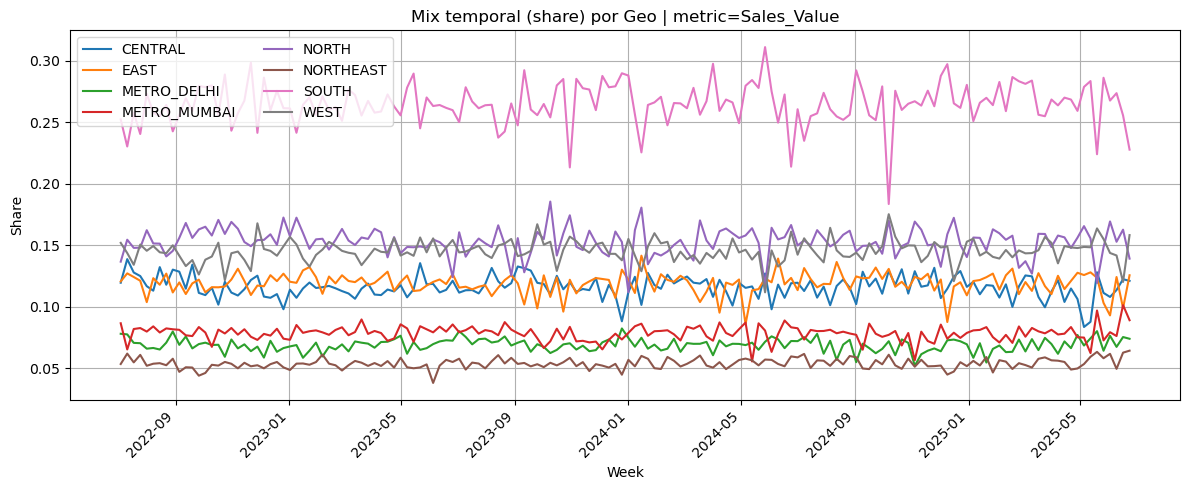

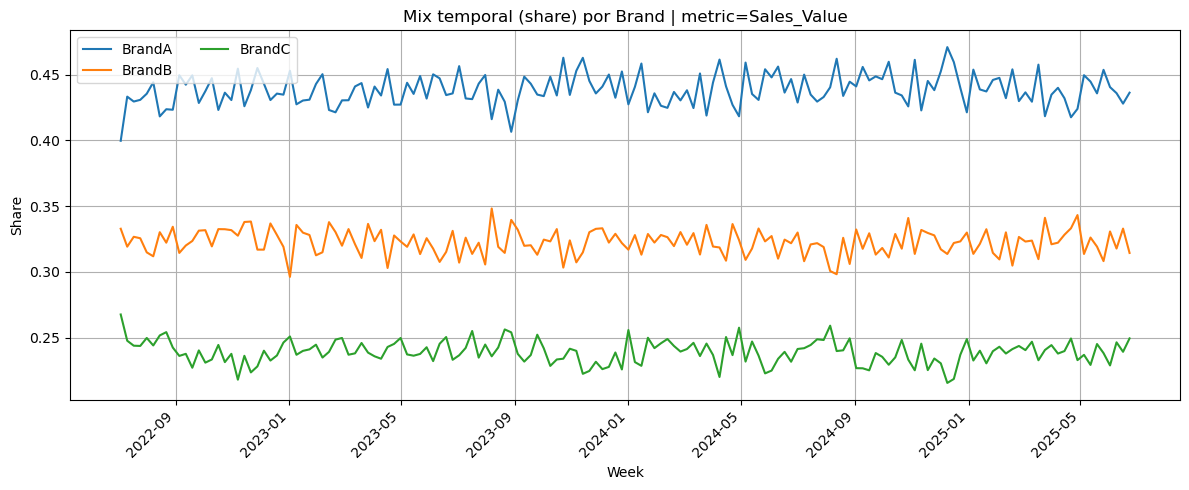

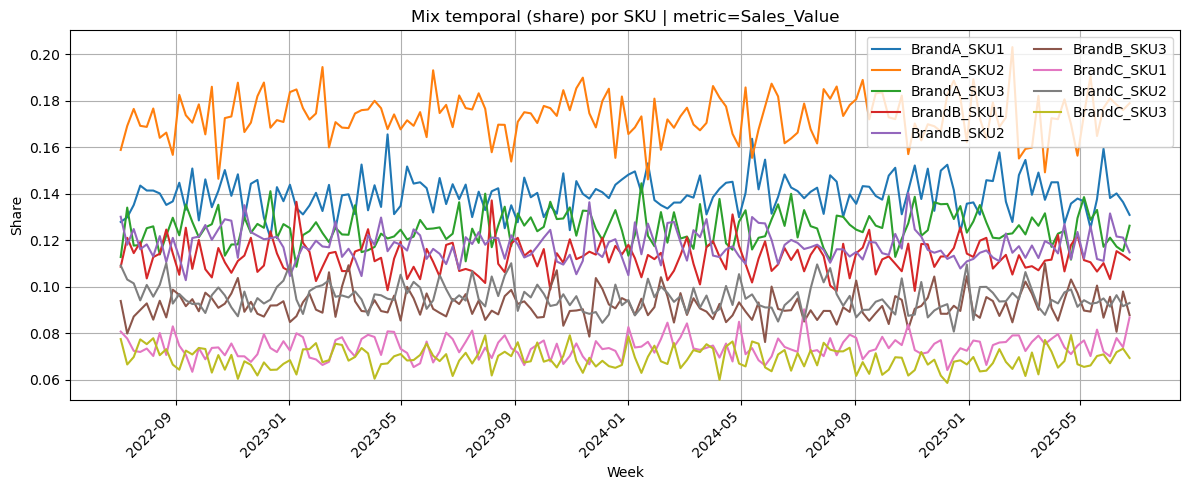


Snapshot ejecutivo (share %, CV, total):


,segment,share,cv,total
6,SOUTH,26.56,0.571,98737889
4,NORTH,15.31,0.808,56934888
7,WEST,14.58,0.479,54187165
1,EAST,11.89,0.551,44185392
0,CENTRAL,11.57,0.514,43022743
3,METRO_MUMBAI,7.82,0.493,29066794
2,METRO_DELHI,6.87,0.544,25534828
5,NORTHEAST,5.41,0.545,20098861


,segment,share,cv,total
0,BrandA,44.00,0.786,163577117
1,BrandB,32.21,0.772,119750753
2,BrandC,23.79,0.703,88440690


,segment,share,cv,total
1,BrandA_SKU2,17.39,0.792,64655190
0,BrandA_SKU1,14.03,0.841,52173571
2,BrandA_SKU3,12.57,0.606,46748357
4,BrandB_SKU2,11.77,0.778,43752821
3,BrandB_SKU1,11.25,0.660,41817680
7,BrandC_SKU2,9.50,0.703,35302680
5,BrandB_SKU3,9.19,0.866,34180252
6,BrandC_SKU1,7.41,0.646,27557001
8,BrandC_SKU3,6.88,0.680,25581010


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 0) Config rápida
# =========================
df = df_main.copy()

TIME_COL = "Week"
GEO_COL = "Geo"
BRAND_COL = "Brand"
SKU_COL = "SKU"

# Intento autodetectar columnas de ventas (ajustá si hace falta)
CANDIDATES_VALUE = ["sales_value", "Sales Value", "Sales_Value", "SalesValue"]
CANDIDATES_UNITS = ["sales_units", "Sales Units", "Sales_Units", "SalesUnits"]

def pick_col(candidates, columns):
    for c in candidates:
        if c in columns:
            return c
    return None

SALES_VALUE_COL = pick_col(CANDIDATES_VALUE, df.columns)
SALES_UNITS_COL = pick_col(CANDIDATES_UNITS, df.columns)

# Si no detecta, setéalas a mano:
# SALES_VALUE_COL = "Sales Value"
# SALES_UNITS_COL = "Sales Units"

if TIME_COL in df.columns:
    df[TIME_COL] = pd.to_datetime(df[TIME_COL], errors="coerce")

# =========================
# 1) Helpers: tablas baseline
# =========================
def share_table(df, group_col, metric_col, top_n=None):
    """Tabla de contribución (share) + stats simples por segmento."""
    g = (
        df.groupby(group_col)[metric_col]
        .agg(total="sum", mean="mean", std="std", min="min", max="max", n="count")
        .reset_index()
    )
    total_all = g["total"].sum()
    g["share"] = g["total"] / total_all
    g["cv"] = g["std"] / g["mean"]
    g = g.sort_values("total", ascending=False)
    if top_n:
        g = g.head(top_n)
    # formato lindo
    g["share"] = (g["share"] * 100).round(2)
    g["cv"] = g["cv"].round(3)
    g["mean"] = g["mean"].round(2)
    g["std"] = g["std"].round(2)
    g["min"] = g["min"].round(2)
    g["max"] = g["max"].round(2)
    return g

def share_over_time(df, time_col, group_col, metric_col, agg="sum"):
    """Share por semana para ver mix en el tiempo."""
    wk = (
        df.groupby([time_col, group_col])[metric_col]
        .agg(agg)
        .reset_index()
        .rename(columns={metric_col: "metric"})
    )
    totals = wk.groupby(time_col)["metric"].sum().rename("total_week")
    wk = wk.merge(totals, on=time_col, how="left")
    wk["share"] = wk["metric"] / wk["total_week"]
    return wk

# =========================
# 2) Ejecutar baseline (Sales Value como default)
# =========================
metric = SALES_VALUE_COL or SALES_UNITS_COL
if metric is None:
    raise ValueError("No pude detectar Sales Value / Sales Units. Seteá SALES_VALUE_COL o SALES_UNITS_COL manualmente.")

print("Usando métrica:", metric)

# --- A) Shares globales + volatilidad por segmento
geo_baseline   = share_table(df, GEO_COL, metric)
brand_baseline = share_table(df, BRAND_COL, metric)
sku_baseline   = share_table(df, SKU_COL, metric)

display(geo_baseline)
display(brand_baseline)
display(sku_baseline)

# =========================
# 3) Mix en el tiempo (share por semana) + plots simples
# =========================
wk_geo   = share_over_time(df, TIME_COL, GEO_COL, metric)
wk_brand = share_over_time(df, TIME_COL, BRAND_COL, metric)
wk_sku   = share_over_time(df, TIME_COL, SKU_COL, metric)

def plot_share_lines(wk, time_col, group_col, title, top_k=6):
    # Top K por contribución total (para no graficar 9 SKUs siempre)
    top = (
        wk.groupby(group_col)["metric"]
        .sum()
        .sort_values(ascending=False)
        .head(top_k)
        .index
    )
    w = wk[wk[group_col].isin(top)].copy()
    pivot = w.pivot_table(index=time_col, columns=group_col, values="share", aggfunc="sum").sort_index()

    plt.figure(figsize=(12, 5))
    for col in pivot.columns:
        plt.plot(pivot.index, pivot[col], label=str(col))
    plt.title(title)
    plt.xlabel(time_col)
    plt.ylabel("Share")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.legend(ncol=2)
    plt.show()

plot_share_lines(wk_geo,   TIME_COL, GEO_COL,   f"Mix temporal (share) por {GEO_COL} | metric={metric}", top_k=8)
plot_share_lines(wk_brand, TIME_COL, BRAND_COL, f"Mix temporal (share) por {BRAND_COL} | metric={metric}", top_k=3)
plot_share_lines(wk_sku,   TIME_COL, SKU_COL,   f"Mix temporal (share) por {SKU_COL} | metric={metric}", top_k=9)

# =========================
# 4) Output ejecutivo: “Top insights candidates” (tabla corta)
# =========================
def executive_snapshot(baseline_df, segment_name):
    out = baseline_df[[segment_name, "share", "cv", "total"]].copy()
    out = out.rename(columns={segment_name: "segment"})
    out["total"] = out["total"].round(0).astype("int64")
    return out

print("\nSnapshot ejecutivo (share %, CV, total):")
display(executive_snapshot(geo_baseline, GEO_COL))
display(executive_snapshot(brand_baseline, BRAND_COL))
display(executive_snapshot(sku_baseline, SKU_COL))


In [37]:
import pandas as pd
import numpy as np

df = df_main.copy()

TIME_COL = "Week"
GEO_COL = "Geo"
BRAND_COL = "Brand"
SKU_COL = "SKU"
METRIC_COL = "Sales_Value"   # ajustá si usás Units

# asegurar datetime
df[TIME_COL] = pd.to_datetime(df[TIME_COL])

# crear año y mes
df["Year"] = df[TIME_COL].dt.year
df["Month"] = df[TIME_COL].dt.month

def executive_snapshot_time(df, segment_col, metric_col):
    """
    Snapshot ejecutivo por Year-Month:
    share %, CV, total y n
    """
    g = (
        df.groupby(["Year", "Month", segment_col])[metric_col]
        .agg(
            total="sum",
            mean="mean",
            std="std",
            n="count"
        )
        .reset_index()
    )

    # share dentro de cada Year-Month
    g["share"] = g["total"] / g.groupby(["Year", "Month"])["total"].transform("sum")

    # coeficiente de variación
    g["cv"] = g["std"] / g["mean"]

    # formato ejecutivo
    g["share"] = (g["share"] * 100).round(2)
    g["cv"] = g["cv"].round(3)
    g["mean"] = g["mean"].round(2)
    g["std"] = g["std"].round(2)
    g["total"] = g["total"].round(0)

    return g.sort_values(["Year", "Month", "share"], ascending=[True, True, False])

# ===== ejecutar =====
geo_snapshot   = executive_snapshot_time(df, GEO_COL, METRIC_COL)
brand_snapshot = executive_snapshot_time(df, BRAND_COL, METRIC_COL)
sku_snapshot   = executive_snapshot_time(df, SKU_COL, METRIC_COL)

display(geo_snapshot.head)
display(brand_snapshot.head)
display(sku_snapshot.head)


<bound method NDFrame.head of      Year  Month           Geo      total      mean       std   n  share  \
6    2022      7         SOUTH  1283410.0  35650.27  17399.52  36  24.55   
4    2022      7         NORTH   771374.0  21427.06  14273.33  36  14.76   
7    2022      7          WEST   754079.0  20946.65   6755.08  36  14.43   
0    2022      7       CENTRAL   671214.0  18644.82   7933.58  36  12.84   
1    2022      7          EAST   646098.0  17947.16   8838.39  36  12.36   
..    ...    ...           ...        ...       ...       ...  ..    ...   
280  2025      6       CENTRAL  1437142.0  39920.61  15758.55  36  11.66   
281  2025      6          EAST  1358984.0  37749.56  17967.32  36  11.03   
283  2025      6  METRO_MUMBAI  1073605.0  29822.35  14082.92  36   8.71   
282  2025      6   METRO_DELHI   907441.0  25206.71  10156.39  36   7.36   
285  2025      6     NORTHEAST   741145.0  20587.35   8971.70  36   6.01   

        cv  
6    0.488  
4    0.666  
7    0.322  
0    

<bound method NDFrame.head of      Year  Month   Brand      total      mean       std    n  share     cv
0    2022      7  BrandA  2221816.0  23143.91  15329.69   96  42.50  0.662
1    2022      7  BrandB  1702354.0  17732.85  11247.32   96  32.56  0.634
2    2022      7  BrandC  1303404.0  13577.13   8114.95   96  24.93  0.598
3    2022      8  BrandA  2833161.0  23609.68  15265.70  120  42.93  0.647
4    2022      8  BrandB  2125400.0  17711.67  11963.29  120  32.20  0.675
..    ...    ...     ...        ...       ...       ...  ...    ...    ...
103  2025      5  BrandB  4531182.0  47199.81  31503.52   96  31.69  0.667
104  2025      5  BrandC  3387619.0  35287.70  21985.71   96  23.69  0.623
105  2025      6  BrandA  5362875.0  55863.29  37064.75   96  43.51  0.663
106  2025      6  BrandB  3993704.0  41601.09  26778.41   96  32.40  0.644
107  2025      6  BrandC  2969359.0  30930.82  18399.92   96  24.09  0.595

[108 rows x 9 columns]>

<bound method NDFrame.head of      Year  Month          SKU      total      mean       std   n  share     cv
1    2022      7  BrandA_SKU2   885741.0  27679.39  18668.02  32  16.94  0.674
0    2022      7  BrandA_SKU1   703408.0  21981.49  16114.51  32  13.46  0.733
4    2022      7  BrandB_SKU2   637734.0  19929.19  13239.63  32  12.20  0.664
2    2022      7  BrandA_SKU3   632667.0  19770.86   8809.83  32  12.10  0.446
3    2022      7  BrandB_SKU1   607731.0  18991.59  10589.56  32  11.63  0.558
..    ...    ...          ...        ...       ...       ...  ..    ...    ...
318  2025      6  BrandB_SKU1  1366723.0  42710.09  19956.05  32  11.09  0.467
322  2025      6  BrandC_SKU2  1146892.0  35840.37  21893.27  32   9.30  0.611
320  2025      6  BrandB_SKU3  1120851.0  35026.58  26073.65  32   9.09  0.744
321  2025      6  BrandC_SKU1   954224.0  29819.50  16577.80  32   7.74  0.556
323  2025      6  BrandC_SKU3   868243.0  27132.59  15566.86  32   7.04  0.574

[324 rows x 9 columns

### Resultados de analisis exploratorio

#### Estructura del deliverable del analisis exploratorio

 * Executive summary
 * EDA visual guiado
 * Tabla de hipótesis


In [10]:
channels = ['TV_Impressions', 'YouTube_Impressions', 'Facebook_Impressions', 'Instagram_Impressions']
print('Correlaciones con Sales_Value para los canales mas visibles:')
print(df[channels + ['Sales_Value']].corr()['Sales_Value'].drop('Sales_Value').sort_values(ascending=False))


Correlaciones con Sales_Value para los canales mas visibles:
Instagram_Impressions    0.476169
TV_Impressions           0.475807
YouTube_Impressions      0.393494
Facebook_Impressions     0.389887
Name: Sales_Value, dtype: float64


## Observaciones claves
- El dataset es semanal por `Week`, `Geo`, `Brand` y `SKU`, con 11k registros sinteticos.
- Las ventas (`Sales_Value`, `Sales_Units`) tienen una media alrededor de 33k / 422 unidades, pero se observan picos muy por encima de eso.
- Las principales palancas de medios (TV, YouTube, Facebook, Instagram) se miden en impresiones, mientras que las promociones se capturan con banderas y `Trade_Spend`.
- Hay controles operativos (precio, distribucion) y macroeconómicos (CPI, GDP, festivales, lluvia), lo cual permite separar baseline de incrementalidad.

Estas observaciones confirman que el archivo contiene tanto las variables de marketing necesarias como los controles que el MMM utiliza para distinguir causas.


## Cómo abordar un modelo MMM con este dataset
1. **Definir el KPI** (`Sales_Value` o `Sales_Units`) y decidir si el modelado se hace por SKU o por agregacion de marca/geografia.
2. **Transformaciones de marketing**: aplicar adstock a cada canal de impresiones y trade spend, luego una funcion de saturacion (Hill/log) para reflejar rendimientos decrecientes.
3. **Variables de control**: incluir precio (`Net_Price`, `MRP`), distribucion (`Weighted_Distribution`, `Numeric_Distribution`, `TDP`, `NOS`) y macrofactores (`CPI`, `GDP_Growth`, `Festival_Index`, `Rainfall_Index`). Agregar dummies de temporada/feriados si hay calendarios disponibles.
4. **Regularizacion y validacion**: usar Ridge o Elastic Net si hay alta correlacion entre canales; validar en bloques cronologicos para capturar estabilidad temporal.
5. **Interpretacion**: reportar baseline vs. lift, ROI por canal (incremental Sales_Value / gasto asociado), elasticidades log-log si se transforman los datos, e intervalos de confianza si se usa enfoque Bayesiano.

El archivo ya provee las palancas y controles tipicos, por lo que el siguiente paso es elegir la ventana temporal, normalizar las series y comenzar la optimizacion de los parametros adstock/saturacion.
